# Predicting the Airline Ticket Fare

#### Importing Libraries

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import pickle

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Airline.csv')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [7]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Data Cleaning

#### Checking for missing values

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
# Checking unique values in each column
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [11]:
# statistics of the price column
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [15]:
#Function to change datatype into to TimeStamp format
def change_into_Datetime(col):
    df[col] = pd.to_datetime(df[col])

In [16]:
#applying function to the columns
for feature in ['Dep_Time','Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [17]:
#Extracting the journey day, month and year
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2025-02-27 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2025-02-27 05:50:00,2025-02-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2025-02-27 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2025-02-27 18:05:00,2025-02-27 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2025-02-27 16:50:00,2025-02-27 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
# Extracting the minute and hours of arrival and departure columns
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

extract_hour_min(df , "Dep_Time")
extract_hour_min(df , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2025-02-27 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2025-02-27 05:50:00,2025-02-27 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2025-02-27 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [20]:
#drop Dep_Time & Arrival_Time
cols_to_drop = ['Arrival_Time', 'Dep_Time']

df.drop(cols_to_drop,axis=1, inplace=True)

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


## Exploratory Data Analysis

#### 1. What Time of day that has most take-off?

In [23]:
def flight_dep_time(x):

    if (x>4) and (x<=8): 
        return "Early Morning"
    elif (x>8) and (x<=12): 
        return "Morning"
    elif (x>12) and (x<=16): 
        return "Afternoon"
    elif (x>16) and (x<=20): 
        return "Evening"
    elif (x>20) and (x<=24): 
        return "Night"
    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

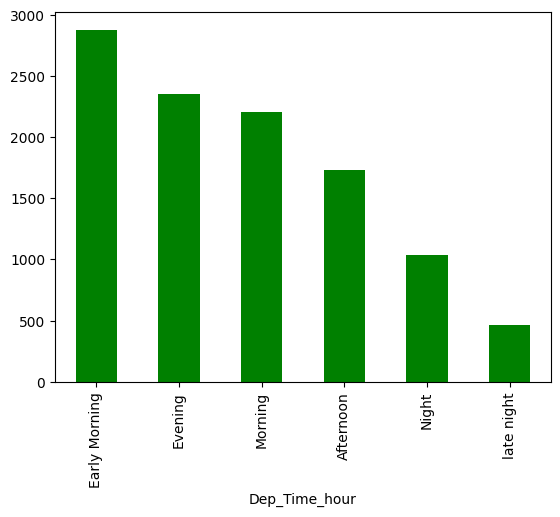

In [24]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar',color='green')

##### Insights
- Early Morning has the most number of flight take-off.
- Late night has the least number of flight take-off.

#### 2. Analyze whether Duration impact the cost of flights.

In [25]:
# Adding hours, minutes to all rows in the Duration columns
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

df['Duration'] = df ['Duration'].apply(preprocess_duration)
df['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [26]:
# Extracting the hours and minutes from the Duration column
df['Duration_hours'] = df['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))
df['Duration_mins'] = df['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [27]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [28]:
df['Duration_total_mins'] = df['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

In [29]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


<Axes: xlabel='Duration_total_mins', ylabel='Price'>

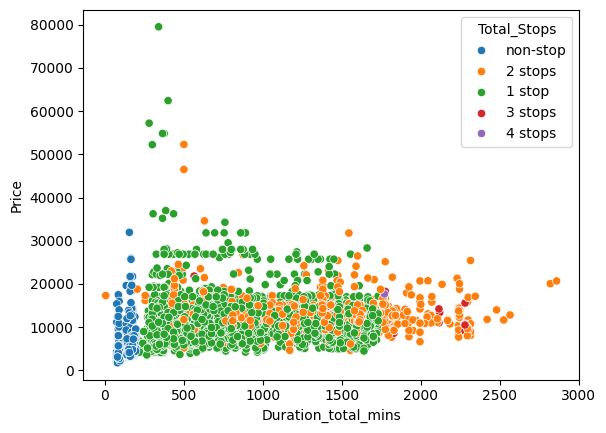

In [30]:
sns.scatterplot(x="Duration_total_mins", y = "Price", data=df, hue= "Total_Stops")

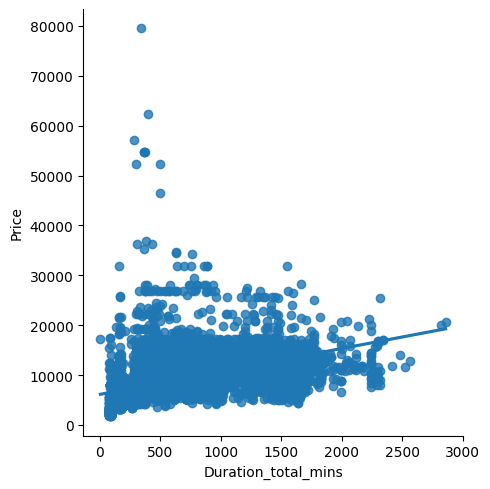

In [31]:
sns.lmplot(x="Duration_total_mins", y = "Price", data=df)

##### Insights
- From the scatterplot, we can see that the total number of stops increases the duration total number of minutes.
  - The plot shows that the total number of stops increases the price value.
- From the lmplot, we can see that the price increases as the total number of minutes increases. 

#### 3. Which airline is used the most and which route are they used the most?

In [32]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [33]:
df['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [34]:
df[df['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU ? BOM ? BLR          930
DEL ? BOM ? COK          875
BLR ? BOM ? DEL          385
BLR ? DEL                382
CCU ? DEL ? BLR          300
BOM ? HYD                207
DEL ? JAI ? BOM ? COK    207
DEL ? AMD ? BOM ? COK    141
DEL ? IDR ? BOM ? COK     86
DEL ? NAG ? BOM ? COK     61
DEL ? ATQ ? BOM ? COK     38
DEL ? COK                 34
DEL ? BHO ? BOM ? COK     29
DEL ? BDQ ? BOM ? COK     28
DEL ? LKO ? BOM ? COK     25
DEL ? JDH ? BOM ? COK     23
CCU ? GAU ? BLR           22
DEL ? MAA ? BOM ? COK     16
DEL ? IXC ? BOM ? COK     13
BLR ? MAA ? DEL           10
BLR ? BDQ ? DEL            8
DEL ? UDR ? BOM ? COK      7
BOM ? DEL ? HYD            5
CCU ? BOM ? PNQ ? BLR      4
BLR ? BOM ? JDH ? DEL      3
DEL ? DED ? BOM ? COK      2
BOM ? BDQ ? DEL ? HYD      2
DEL ? CCU ? BOM ? COK      1
BOM ? VNS ? DEL ? HYD      1
BOM ? UDR ? DEL ? HYD      1
BOM ? JDH ? DEL ? HYD      1
BOM ? IDR ? DEL ? HYD      1
BOM ? DED ? DEL ? HYD      1
dtype: int64

#### Insights
- The airline that is used the most is Jet Airways.
- The route that Jet Airways is used most is CCU -> BOM -> BLR.

#### 4. The statistics of the Airline column. 

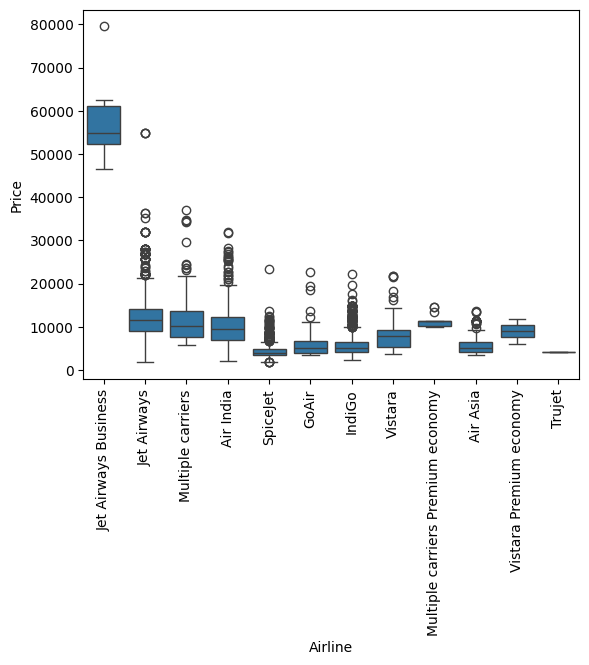

In [35]:
sns.boxplot(y='Price', x='Airline',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")
plt.show()

#### Insights
- Jet Airways Business is the most expensive airline. 
- From Jet Airways to Air Asia, there is a lot of outliers, and we would want to fix that for the ML. 

## Feature Engineering

In [ ]:
### 5. Feature Engineering 
- Apply One-hot encoding
- Perform Target-guiding encoding
- Perform manual encoding
- Remove Unnecessary columns
- Detect outliers
- Deal with outliers

#### 5.1 One-hot encoding
- Define Categorical columns and perform one-hot encoding. 


In [36]:
#Define numerical and categorical columns
#Target column is 'Price'
cat_col = [col for col in df.columns if df[col].dtype == "object"]
print('The categorical columns are: {}'.format(cat_col))

num_col = [col for col in df.columns if df[col].dtype != "object"]
print('The numerical columns are: {}'.format(num_col))

The categorical columns are: ['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info']
The numerical columns are: ['Date_of_Journey', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins', 'Duration_total_mins']


#### - Applying one-hot encoding-

In [37]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [38]:
for sub_category in df['Source'].unique():
    df['Source_'+sub_category] = df['Source'].apply(lambda x : 1 if x== sub_category else 0)

In [39]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


#### - Perform Target-guided encoding -

In [40]:
df['Airline'].nunique()

12

In [41]:
df.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [42]:
airlines = df.groupby(['Airline'])['Price'].mean().sort_values(ascending=False).index
airlines



Index(['Jet Airways Business', 'Jet Airways',
       'Multiple carriers Premium economy', 'Multiple carriers', 'Air India',
       'Vistara Premium economy', 'Vistara', 'GoAir', 'IndiGo', 'Air Asia',
       'SpiceJet', 'Trujet'],
      dtype='object', name='Airline')

In [43]:
dict_airlines = {key:index for index , key in enumerate(airlines, 0)}
dict_airlines

{'Jet Airways Business': 0,
 'Jet Airways': 1,
 'Multiple carriers Premium economy': 2,
 'Multiple carriers': 3,
 'Air India': 4,
 'Vistara Premium economy': 5,
 'Vistara': 6,
 'GoAir': 7,
 'IndiGo': 8,
 'Air Asia': 9,
 'SpiceJet': 10,
 'Trujet': 11}

In [44]:
df['Airline'] = df['Airline'].map(dict_airlines)

In [45]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,8,2019-03-24,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,4,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


#### Insights
- The target encoding starts with the airline that cost the most on average to the cheapest airline. 

##### - Perform target-encoding on the Destination column -

In [46]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [47]:
# New Delhi and Delhi are the same, so combine them
df['Destination'].replace('New Delhi', 'Delhi',inplace=True)
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [48]:
dest = df.groupby(['Destination'])['Price'].mean().sort_values().index
dict_dest = {key:index for index , key in enumerate(dest, 0)}

df['Destination'] = df['Destination'].map(dict_dest)
df['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [49]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,8,2019-03-24,Banglore,2,BLR ? DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,4,2019-05-01,Kolkata,3,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


#### - Manual Encoding on Total_Stops column -

In [50]:
df.dtypes

Airline                         int64
Date_of_Journey        datetime64[ns]
Source                         object
Destination                     int64
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_Day                     int32
Journey_Month                   int32
Journey_Year                    int32
Dep_Time_hour                   int32
Dep_Time_minute                 int32
Arrival_Time_hour               int32
Arrival_Time_minute             int32
Duration_hours                  int64
Duration_mins                   int64
Duration_total_mins             int64
Source_Banglore                 int64
Source_Kolkata                  int64
Source_Delhi                    int64
Source_Chennai                  int64
Source_Mumbai                   int64
dtype: object

In [51]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [52]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops'] = df['Total_Stops'].map(stop)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,8,2019-03-24,Banglore,2,BLR ? DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,4,2019-05-01,Kolkata,3,CCU ? IXR ? BBI ? BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


#### - Remove unnecessary columns -

In [53]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [54]:
df['Additional_Info'].value_counts

<bound method IndexOpsMixin.value_counts of 0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object>

In [55]:
df['Additional_Info'].value_counts()/len(df)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: count, dtype: float64

In [56]:
df.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source'],inplace=True)

In [57]:
df.dtypes

Airline                 int64
Destination             int64
Route                  object
Duration               object
Total_Stops             int64
Price                   int64
Journey_Day             int32
Journey_Month           int32
Journey_Year            int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours          int64
Duration_mins           int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [58]:
df.drop(columns=['Journey_Year'],axis=1,inplace=True)

In [59]:
df.dtypes

Airline                 int64
Destination             int64
Route                  object
Duration               object
Total_Stops             int64
Price                   int64
Journey_Day             int32
Journey_Month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours          int64
Duration_mins           int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [60]:
df.drop(columns=['Route','Duration'],inplace=True,axis=1)
df.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,8,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,4,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [62]:
df.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                  int64
Journey_Day            int32
Journey_Month          int32
Dep_Time_hour          int32
Dep_Time_minute        int32
Arrival_Time_hour      int32
Arrival_Time_minute    int32
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

#### - Detect Outliers in the Price column -

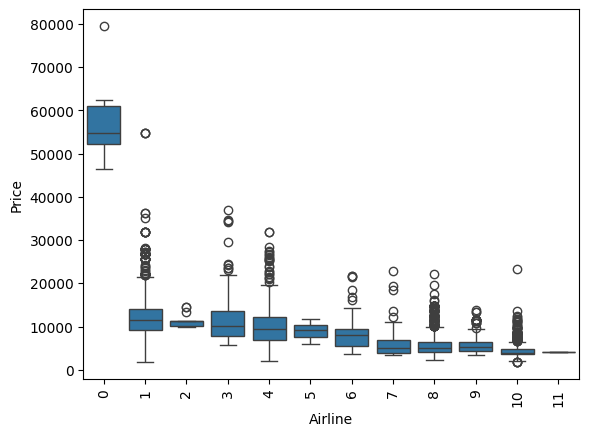

In [61]:
sns.boxplot(y='Price', x='Airline',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")
plt.show()

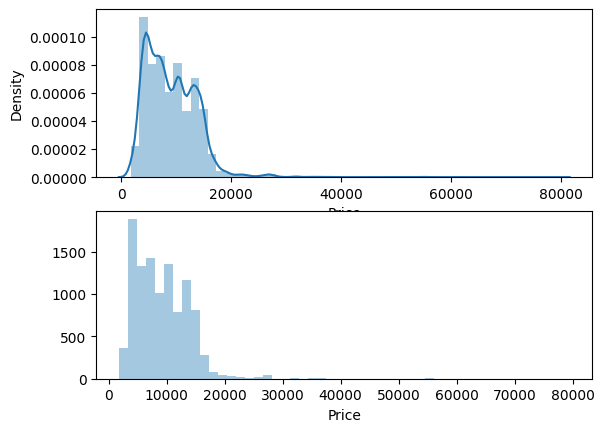

In [62]:
def plot(df, col):
    fig , (ax1, ax2) = plt.subplots(2,1)

    sns.distplot(df[col] , ax=ax1)
    sns.distplot(df[col] , ax=ax2, kde=False)

plot(df, 'Price')

In [63]:
# Find max and min of Price column
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

iqr = q3 - q1 
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [64]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [65]:
# Find all outliers 
print([price for price in df['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [67]:
# Find the count of outliers
len([price for price in df['Price'] if price > maximum or price < minimum])

94

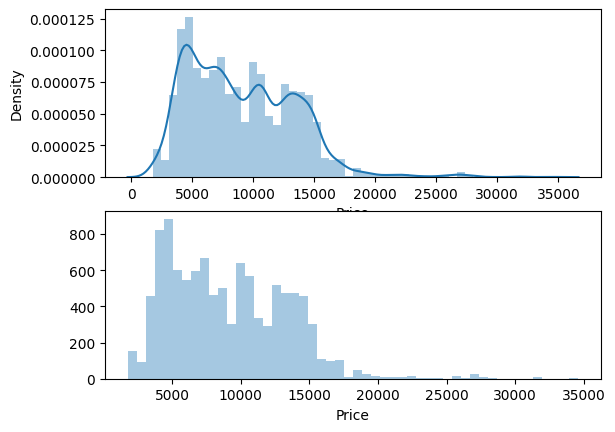

In [68]:
# Replace outliers with mean
df['Price'] = np.where(df['Price']>=35000, df['Price'].median() , df['Price'])
plot(df, 'Price')

##### Insights
- As we can see, the outliers redueced to 35000

In [69]:
X = df.drop(['Price'],axis=1)
y = df['Price']

from sklearn.feature_selection import mutual_info_regression

In [70]:
imp = mutual_info_regression(X, y)
imp_df = pd.DataFrame(imp, index=X.columns)
imp_df.columns = ['Importance']
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Airline,1.322967
Arrival_Time_hour,1.143415
Duration_hours,1.118799
Destination,1.064971
Dep_Time_hour,0.918649
Arrival_Time_minute,0.907158
Total_Stops,0.798130
Dep_Time_minute,0.756187
Duration_mins,0.673696
Journey_Month,0.628534


In [71]:
df.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,8,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,4,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


#### Save file

In [72]:
df.to_csv('eda_data.csv', index=False)

In [75]:
df_ML = pd.read_csv('eda_data.csv')

In [76]:
df_ML.head()

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,8,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,4,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,1,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,8,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,8,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [77]:
# x and y variable
X = df.drop(['Price'],axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Random forest
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)

y_pred = ml_model.predict(X_test)
y_pred

array([16788.41  ,  5367.79  ,  8916.68  , ...,  6589.58  , 12841.5705,
       13209.9805])

## Create ML Pipeline

In [79]:
def mape(y_true, y_pred):
    y_true , y_pred = np.array(y_true), np.array(y_pred)
    np.mean(np.abs((y_true - y_pred) /y_true))*100

mape(y_test, y_pred)

In [80]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predicitions are: {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE: {}'.format(mape(y_test, y_prediction)))

    sns.distplot(y_test - y_prediction)

Training Score: 0.9651196669167478
Predicitions are: [16840.  4959.  9397. ...  6152. 13339. 14335.]


r2_score: 0.6941039174393955
MAE: 1392.0500311963813
MSE: 6159307.318822986
RMSE: 2481.795180675268
MAPE: None


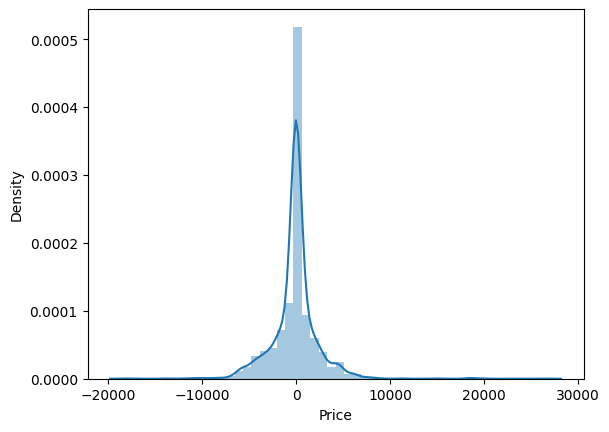

In [81]:
predict(DecisionTreeRegressor())

Training Score: 0.9513107553256176
Predicitions are: [16925.89        5418.41        8836.72       ...  6555.76
 12974.10666667 12786.4625    ]


r2_score: 0.8152704135000854
MAE: 1188.0761803983075
MSE: 3719584.391560961
RMSE: 1928.6224077203296
MAPE: None


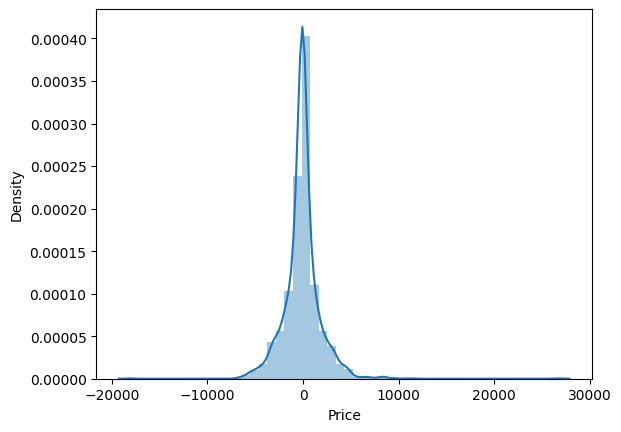

In [82]:
predict(RandomForestRegressor())

## Hypertune Random Forest

In [83]:
reg_rf = RandomForestRegressor()

In [85]:
np.linspace(start = 100, stop = 1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [86]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num=4)]
min_samples_split = [5,10,15,100]

In [87]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [88]:
{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [89]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [90]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [91]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=540)

In [92]:
rf_random.best_score_

0.8074034006670328